IMPORTING THE DEPENDANCIES

In [1]:
import numpy as np                   #for numpy arrays
import pandas as pd                  #converting data set into dataframes[structured table] & fetching data
import matplotlib.pyplot as plt      #to make plots
import seaborn as sns                #to make plots
from sklearn.cluster import KMeans  #to use KMeans clustering algorithm

In [2]:
# loading data from csv file to a pandas dataframe
customerdata=pd.read_csv('Mall_Customers.csv')


In [3]:
# displaying data
customerdata

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
# first 5 rows in the dataframe
customerdata.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# no. of rows and columns in this dataframe
print("rows,columns:",customerdata.shape)

rows,columns: (200, 5)


In [8]:
# getting more infomation about the data set
print("Data set Info:\n",customerdata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
Data set Info:
 None


In [9]:
# checking for missing values of dataset in each column
print("No. of missing values:",customerdata.isnull().sum())


No. of missing values: CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


CHOOSING THE ANNUAL INCOME COLUMN AND SPENDING SCORE COLUMN

In [13]:
# classifying group of customers based on the annual income and spending score
# extracting only these two columns from the customer data
# iloc->locating specific columns iloc[rows,columns]
# slicing
# all rows of column 3rd and 4th
x=customerdata.iloc[:,[3,4]].values 
print("Annual income & Spending score")
x

Annual income & Spending score


array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

CHOOSING THE NUMBER OF CLUSTERS
WCSS->within clusters sum of squares,ELBOW METHOD

In [20]:
# finding wcss value [elbow method]
wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
print(wcss)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

[269981.28, 181363.59595959593, 106348.37306211118, 73679.78903948836, 44448.45544793371, 37233.81451071001, 30259.65720728547, 25011.839349156588, 21862.092672182887, 19672.07284901432]


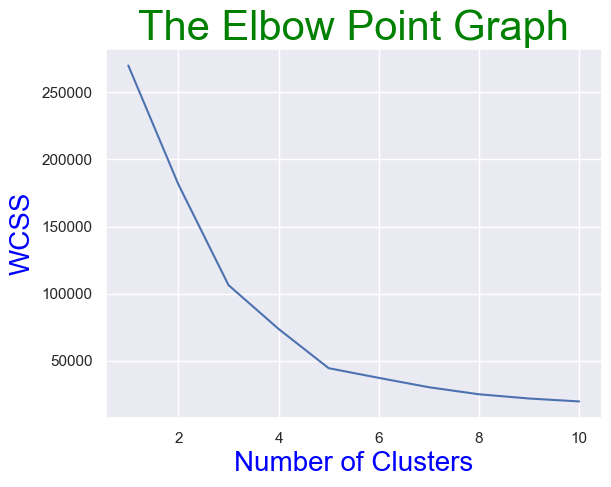

In [22]:
# plotting an elbow graph
sns.set()  #gives basic thems and basic parameters for required for the graph
plt.plot(range(1,11),wcss)
plt.title('The Elbow Point Graph',color="green",size=30)
plt.xlabel('Number of Clusters',color="blue",size=20)
plt.ylabel('WCSS',color="blue",size=20)
plt.show()

OPTIMUM NUMBER OF CLUSTERS:5
NO. of clusters=5
As after that there is no sharp significant drop

TRAINING THE K-MEANS CLUSTERING MODEL[K=NO. OF CLUSTERS]

In [25]:
# loading our model to the variable kmeans
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)

# returning a label for each data point based on their cluster->all 5 clusters will be given a label
# fit_predict ->return cluster number for each data point
y=kmeans.fit_predict(x)
print("Y:\n",y)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Y:
 [4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


5 values as we need only 5 clusters[0 to 4]

VISUALIZING ALL THE CLUSTERS
centroids->center point of each clusters

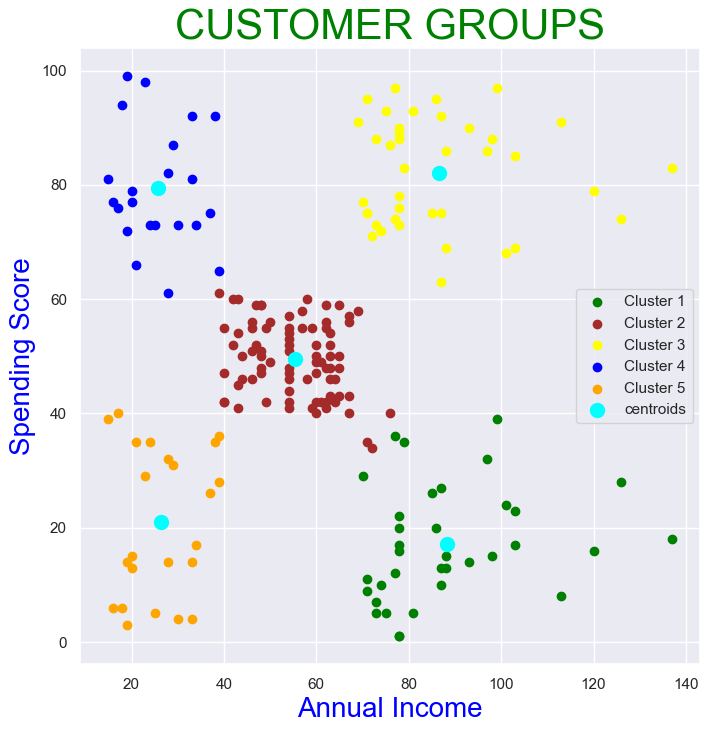

In [31]:
# plotting all the clusters and their centroids
plt.figure(figsize=(8,8))#->figure size
#  [Annual income]X:0       Y:1[spending score]
# [Annual income]X:0       Y:1[spending score]
plt.scatter(x[y == 0, 0], x[y == 0, 1], color='green', label='Cluster 1')
plt.scatter(x[y == 1, 0], x[y == 1, 1], color='brown', label='Cluster 2')
plt.scatter(x[y == 2, 0], x[y == 2, 1], color='yellow', label='Cluster 3')
plt.scatter(x[y == 3, 0], x[y == 3, 1], color='blue', label='Cluster 4')
plt.scatter(x[y == 4, 0], x[y == 4, 1], color='orange', label='Cluster 5')


# plotting centroids,s->size of dots,c->color of dots
#                                  x axis:0                     y axis:1        
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,color='cyan',label='centroids')
plt.title('CUSTOMER GROUPS',size=30,color='green')
plt.xlabel('Annual Income',color="blue",size=20)
plt.ylabel("Spending Score",color="blue",size=20)
plt.legend()
plt.show()